In [1]:
# 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
[Step 1 ~ 3] 데이터 준비 
'''
# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('./data/auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# horsepower 열의 자료형 변경 (문자열 ->숫자)
df['horsepower'] = df['horsepower'].replace('?', np.nan)      # '?'을 np.nan으로 변경
df['horsepower'] = df['horsepower'].astype('float')           # 문자열을 실수형으로 변환

# 결측치 대체
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())               

# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

'''
Step 4: 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X=ndf[['cylinders', 'horsepower', 'weight']]  #독립 변수 X1, X2, X3
y=ndf['mpg']     #종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)     

훈련 데이터:  (278, 3)
검증 데이터:  (120, 3)


In [2]:
'''
Step 5: 다중회귀분석 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()   

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print('R^2 결정계수: ', r_square)

R^2 결정계수:  0.6895968946794342


In [3]:
# 회귀식의 기울기
print('X 변수의 계수 a: ', lr.coef_)

# 회귀식의 y절편
print('상수항 b:', lr.intercept_)

X 변수의 계수 a:  [-0.38212538 -0.04709428 -0.00514076]
상수항 b: 46.09948474328229


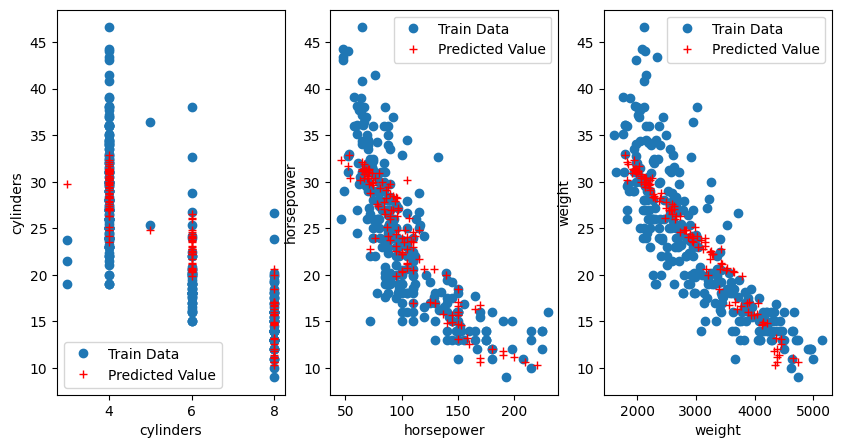

In [4]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력 
y_hat_test = lr.predict(X_test)

fig, axes = plt.subplots(1, 3, figsize=(10, 5))

for i, col in enumerate(X_test.columns):
    axes[i].plot(X_train[col], y_train, 'o', label='Train Data')         # 데이터 분포
    axes[i].plot(X_test[col], y_hat_test, 'r+', label='Predicted Value') # 모형이 학습한 회귀선
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(col)
    axes[i].legend(loc='best')
    
plt.show()

In [5]:
# 사이킷런 함수 활용 (평균 제곱 오차)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_hat_test)
print('mse: ', np.round(mse, 2))

# 평균 절대값 오차
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_hat_test)
print('mae: ', np.round(mae, 2))

mse:  17.88
mae:  3.33
